In [1]:
from operator import itemgetter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('seaborn')   

/home/fsz/environnements/mlearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/fsz/environnements/mlearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/fsz/environnements/mlearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Define K-nearest neighbors classifier

In [2]:
class Knn():
    def __init__(self,X_train,X_test,y_train, y_test,k_neighbors):
        
        self.pred = []
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.k = k_neighbors
        
    def compute_distance (self,train_val, test_val, vect_len, p=2):
        """Compute distance between two vectors
        p = 1 -> Mannathan distance
        p = 2 -> Euclidian distance 
        p > 2 -> Minkowski distance
        
        """
    
        dist = 0
        for i in range(0,vect_len):
            dist += (train_val[i] - test_val[i])**p

        dist = np.sqrt(dist)

        return dist
    
    
    def find_neighbors(self):
        
        for j in range(0, self.X_test.shape[0]):
            e_dist = []
            
            for idx in range(0, self.X_train.shape[0]):
                # Compute distance 
                ed = self.compute_distance(self.X_train.iloc[idx].values, self.X_test.iloc[j].values,self.X_train.shape[1])
                # Store distance & index in dataframe
                e_dist.append((ed, idx)) 
                
            # Sort element by distance 
            e_dist.sort(key=itemgetter(0))
        
            neighbors = []
            classif_score = {}
            
            for i in range(0, self.k):
                # Get index of neighbor in train dataframe
                neighbors.append(e_dist[i][1])

                # Get class of the neighbor
                neighbor_class = self.y_train.iloc[neighbors[i]]

                if neighbor_class in classif_score:
                    classif_score[self.y_train.iloc[neighbors[i]]] += 1

                else:
                    classif_score[neighbor_class] = 1
            
            self.pred.append(max(classif_score))
        
    def predict(self):
        self.find_neighbors()
        return self.pred
    
    def report(self):      
        y_true = self.y_test.to_list()
        
        # Get precision recall & f1-score
        print("Classification report: \n", classification_report(self.pred, y_true))
        
        # Plot confusion matrix
        plt.title('Confusion Matrix')
        sns.heatmap(confusion_matrix(self.pred,y_true), annot=True)

In [3]:
# Load data from sklearn.datasets
data_wine = load_wine()

# Create dataframe from loaded data
data_wine = pd.DataFrame(data=np.c_[data_wine['data'], data_wine['target']],
                     columns=data_wine['feature_names'] + ['target'])
data_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


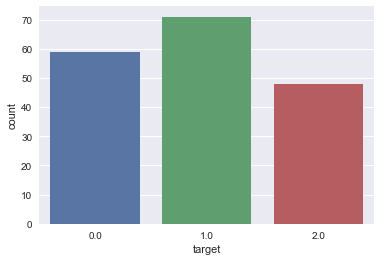

In [4]:
# Count number of sample in each class
sns.countplot(data_wine['target'])

In [5]:
X = data_wine.drop('target', axis=1)
y = data_wine['target']

# Standardize data
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Try our custom knn algorithm

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.80      0.92      0.86        13
         2.0       1.00      0.85      0.92        13

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



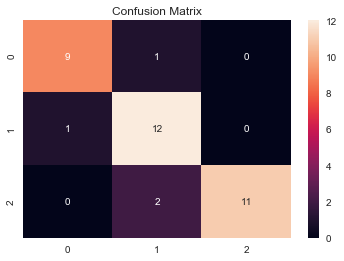

In [7]:
knn = Knn(X_train, X_test, y_train, y_test, 5)
knn.predict()
knn.report()

## Compare result to sklearn implementation

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Classification report : \n", classification_report(pred, y_test))

/home/fsz/environnements/mlearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.80      1.00      0.89        12
         2.0       1.00      0.85      0.92        13

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



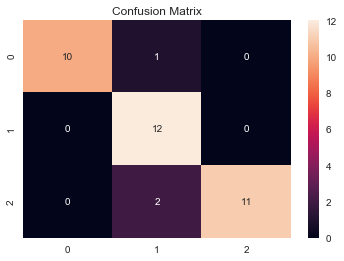

In [9]:
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(pred, y_test), annot=True)